# We learned...
+ VSCode & pixi
+ GitHub usage
+ Data manipulation with Numpy
+ Matplotlib (Images & Plot Layouts)
+ Pandas / Data Exploration
+ Training with real data :)

# Analysis of Mental Rotation Task Dataset


![MR](mr.gif)

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statannotations.Annotator import Annotator
from scipy.stats import ttest_ind
import matplotlib.gridspec as gridspec

## Reading the dataset

In [19]:
df = pd.read_csv('mental_rotation.csv')
df.head()

,Subject,Trial,Angle,Time,Correct,Age,Sex
0,49,1,0,3107,1,32,M
1,49,2,150,2930,1,32,M
2,49,3,150,1874,1,32,M
3,49,4,100,3793,1,32,M
4,49,5,50,2184,1,32,M


C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\1190413698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_u, x='Sex', y='Age', linecolor='gray', palette={'M': 'skyblue', 'F': 'salmon'},
C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\1190413698.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.boxplot(df_u, x='Sex', y='Age', linecolor='gray', palette={'M': 'skyblue', 'F': 'salmon'},
C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\1190413698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(df_u, x='Sex', y='Age', palette={'M': 'blue', 'F': 'magenta'}, size=3)


<Axes: xlabel='Sex', ylabel='Age'>

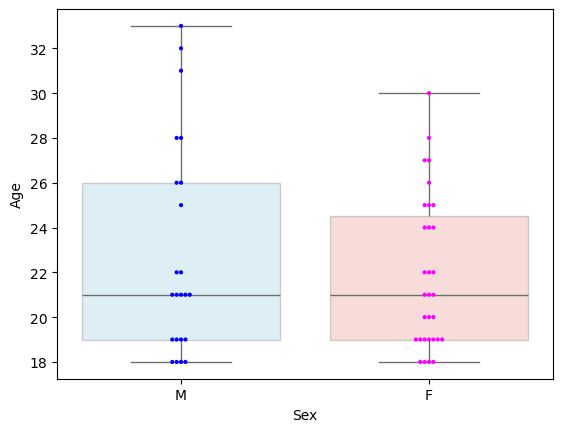

In [48]:
df_u = df.drop_duplicates(subset='Subject')
sns.boxplot(df_u, x='Sex', y='Age', linecolor='gray', palette={'M': 'skyblue', 'F': 'salmon'},
            boxprops=dict(alpha=0.3))
sns.swarmplot(df_u, x='Sex', y='Age', palette={'M': 'blue', 'F': 'magenta'}, size=3)


## Incorrect and Correct Responses by Sex

In [20]:
df_u = df.drop_duplicates(subset='Subject')
df_u.groupby(['Correct', 'Sex']).size()

Correct  Sex
0        F       2
         M       4
1        F      29
         M      19
dtype: int64

## Plotting the same

<Axes: xlabel='Sex', ylabel='count'>

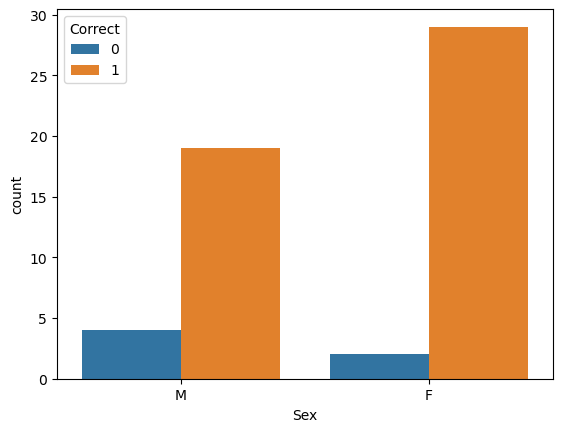

In [21]:
sns.countplot(df_u, x='Sex', hue='Correct')

In [22]:
summary = df.groupby('Angle').agg(
    accuracy=('Correct', 'mean'),
    mean_time=('Time', 'mean'),
    std_time=('Time', 'std'),
    n=('Correct', 'count')
)
summary

,accuracy,mean_time,std_time,n
Angle,,,,
0,0.954474,1952.644427,1092.730226,1274
50,0.935937,2561.967187,1313.524830,1280
100,0.888977,3138.325139,1391.712845,1261
150,0.837580,3288.240446,1428.442801,1256


In [23]:
import statsmodels.formula.api as smf
model_full = smf.mixedlm("Time ~ C(Angle) + Age + C(Sex)", df, groups=df["Subject"])
result_full = model_full.fit()
print(result_full.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   Time        
No. Observations:     5071      Method:               REML        
No. Groups:           54        Scale:                1267351.3992
Min. group size:      85        Log-Likelihood:       -42888.1683 
Max. group size:      96        Converged:            Yes         
Mean group size:      93.9                                        
------------------------------------------------------------------
                  Coef.    Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------
Intercept         1962.097  524.464  3.741 0.000  934.167 2990.028
C(Angle)[T.50]     620.966   44.556 13.937 0.000  533.637  708.295
C(Angle)[T.100]   1202.983   44.728 26.896 0.000 1115.319 1290.648
C(Angle)[T.150]   1358.719   44.773 30.347 0.000 1270.965 1446.473
C(Sex)[T.M]       -425.956  187.887 -2.267 0.023 -794.207  -57.704
Age       

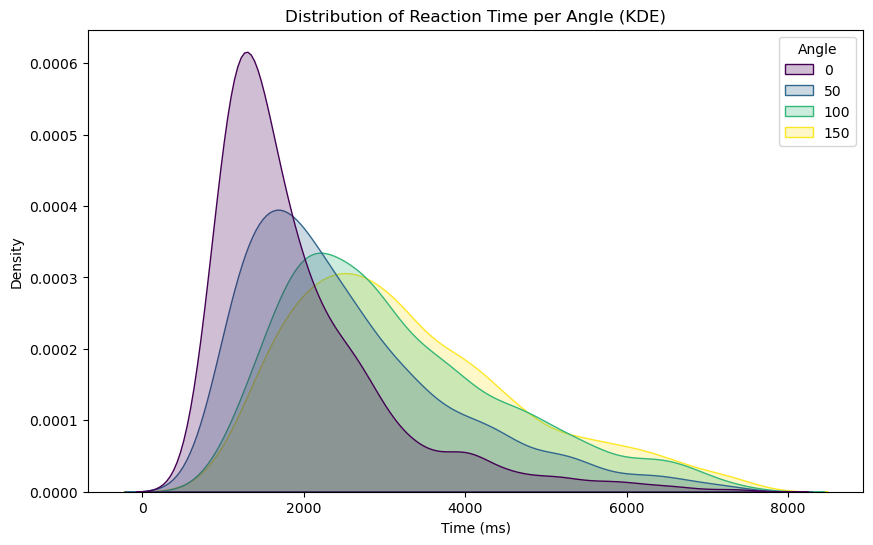

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time', hue='Angle', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of Reaction Time per Angle (KDE)')
plt.xlabel('Time (ms)')
plt.ylabel('Density')
plt.show()

Accuracy per Angle:
Angle
0      0.954474
50     0.935937
100    0.888977
150    0.837580
Name: Correct, dtype: float64


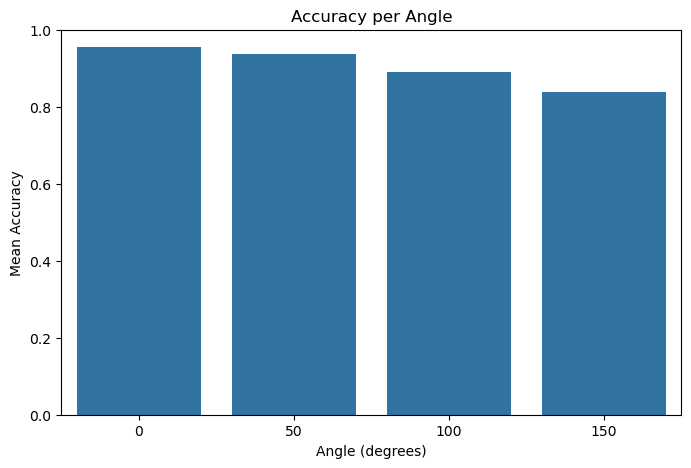

In [42]:
accuracy_per_angle = df.groupby('Angle')['Correct'].mean()
print("Accuracy per Angle:")
print(accuracy_per_angle)
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_per_angle.index, y=accuracy_per_angle.values)
plt.title('Accuracy per Angle')
plt.xlabel('Angle (degrees)')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportion
plt.show()

Trial_bin
0    0.881092
1    0.927342
2    0.911321
3    0.854701
4    0.903774
5    0.912863
6    0.947566
7    0.941667
8    0.858757
9    0.904167
Name: Correct, dtype: float64
Trial_bin
0    3308.608187
1    2893.357553
2    2852.807547
3    3242.318376
4    2586.745283
5    2329.421162
6    2232.709738
7    2581.062500
8    2785.337100
9    2522.006250
Name: Time, dtype: float64


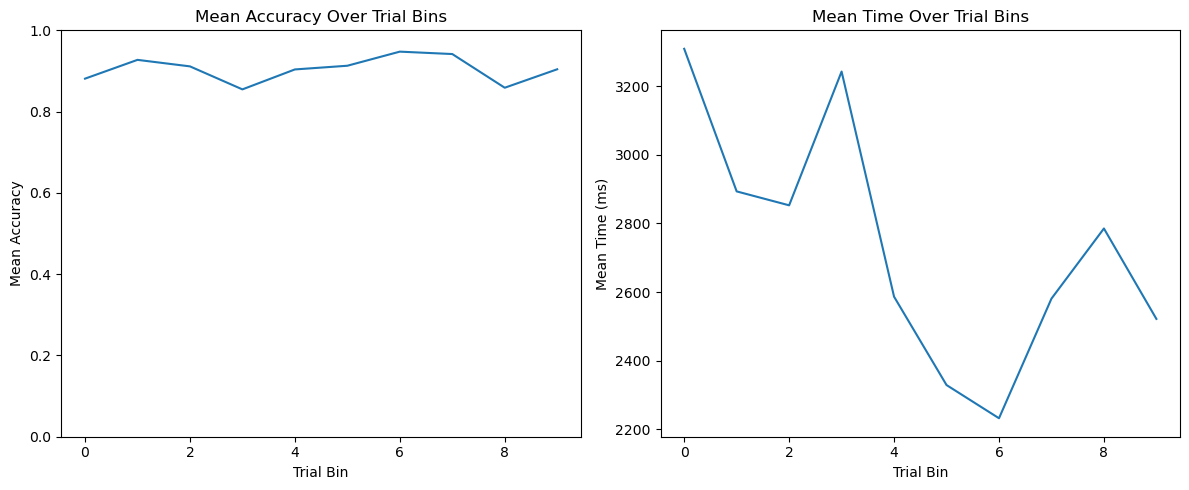

In [57]:
df['Trial_bin'] = pd.qcut(df['Trial'], 10, labels=False)
print(df.groupby('Trial_bin')['Correct'].mean())
print(df.groupby('Trial_bin')['Time'].mean())

# Group by trial bin and calculate mean accuracy and mean time
trial_bin_summary = df.groupby('Trial_bin').agg(
    mean_accuracy=('Correct', 'mean'),
    mean_time=('Time', 'mean')
).reset_index()
# Plot the trends over trial bins
plt.figure(figsize=(12, 5))
# Plot for mean accuracy over trial bins
plt.subplot(1, 2, 1)
sns.lineplot(data=trial_bin_summary, x='Trial_bin', y='mean_accuracy')
plt.title('Mean Accuracy Over Trial Bins')
plt.xlabel('Trial Bin')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)
# Plot for mean time over trial bins
plt.subplot(1, 2, 2)
sns.lineplot(data=trial_bin_summary, x='Trial_bin', y='mean_time')
plt.title('Mean Time Over Trial Bins')
plt.xlabel('Trial Bin')
plt.ylabel('Mean Time (ms)')
plt.tight_layout()
plt.show()

Input parameter: Time


C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\3725507630.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_relcorrect = df.groupby('p_interval')['Correct'].sum() / df.groupby('p_interval')['Correct'].size()


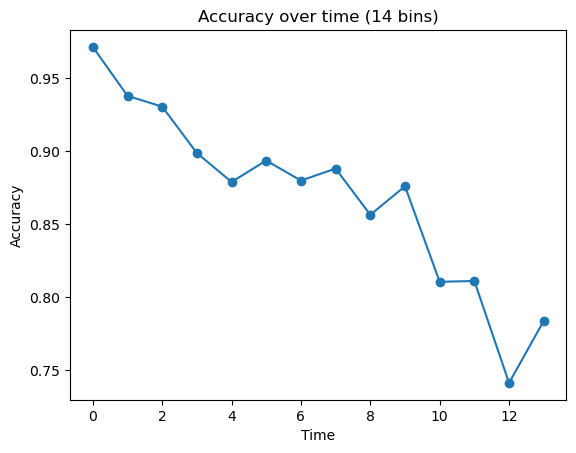

In [59]:
def plot_lineplot_with_intervals(df, input_parameter, n_int):
    print(f'Input parameter: {input_parameter}')
    min = df[input_parameter].min()
    max = df[input_parameter].max()
    int = np.linspace(min, max, n_int)
    df['p_interval'] = pd.cut(df[input_parameter], bins=int, include_lowest=True)
    df_relcorrect = df.groupby('p_interval')['Correct'].sum() / df.groupby('p_interval')['Correct'].size()
    x = range(len(df_relcorrect))
    y = df_relcorrect.values
    plt.plot(x, y, marker='o')
    plt.xlabel('Time')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over time (14 bins)')

plot_lineplot_with_intervals(df, 'Time', 15)


Cross-validation scores: [0.88571429 0.88954635 0.88954635 0.88658777 0.89546351]
Mean CV accuracy: 0.8893716539870384

Permutation Feature Importance:
Time: 0.0078 +/- 0.0034
Age: 0.0070 +/- 0.0041
Trial: 0.0057 +/- 0.0041
Angle: 0.0021 +/- 0.0018


C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\468193070.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


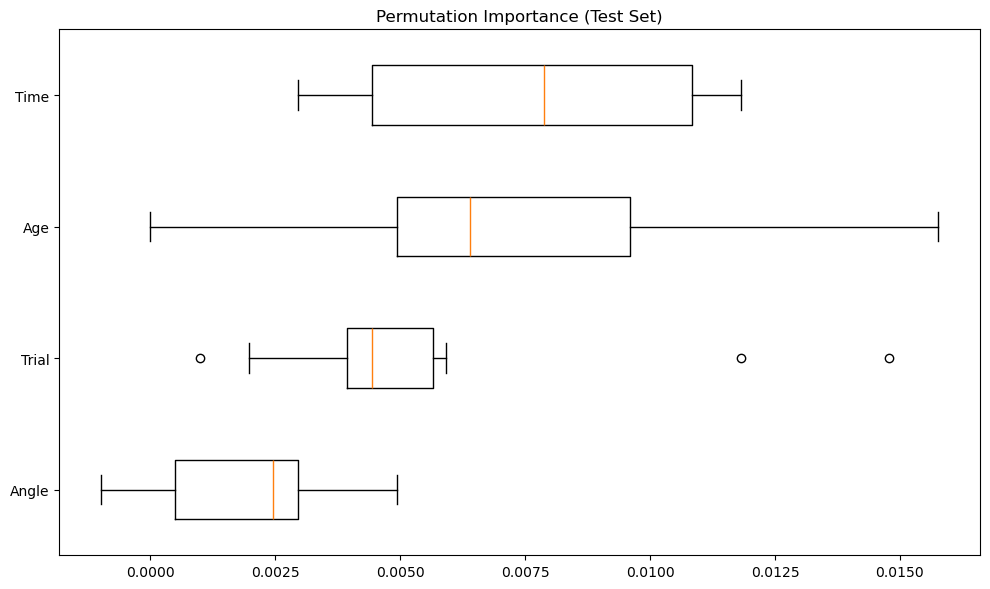

In [49]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
# Define features (X) and target (y)
# We want to predict 'Correct' based on other numerical features
# Let's use 'Angle', 'Time', 'Age', and 'Trial' as features
X = df[['Angle', 'Time', 'Age', 'Trial']]
y = df['Correct']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5) # Using 5 folds for cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
# Train the model on the training data for permutation importance
rf_clf.fit(X_train, y_train)
# Calculate permutation feature importance
result = permutation_importance(rf_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# Sort features by importance
sorted_idx = result.importances_mean.argsort()
print("\nPermutation Feature Importance:")
for i in sorted_idx[::-1]:
    print(f"{X.columns[i]}: {result.importances_mean[i]:.4f} +/- {result.importances_std[i]:.4f}")
# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importance (Test Set)")
plt.tight_layout()
plt.show()








C:\Users\sangeetha\AppData\Local\Temp\ipykernel_14796\2203036220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Angle', y='Time', data=df, inner='box', palette='Set2')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 50: Mann-Whitney-Wilcoxon test two-sided, P_val:7.018e-46 U_stat=5.504e+05
50 vs. 100: Mann-Whitney-Wilcoxon test two-sided, P_val:3.085e-32 U_stat=5.885e+05
100 vs. 150: Mann-Whitney-Wilcoxon test two-sided, P_val:4.308e-03 U_stat=7.399e+05
0 vs. 150: Mann-Whitney-Wilcoxon test two-sided, P_val:1.209e-153 U_stat=3.150e+05


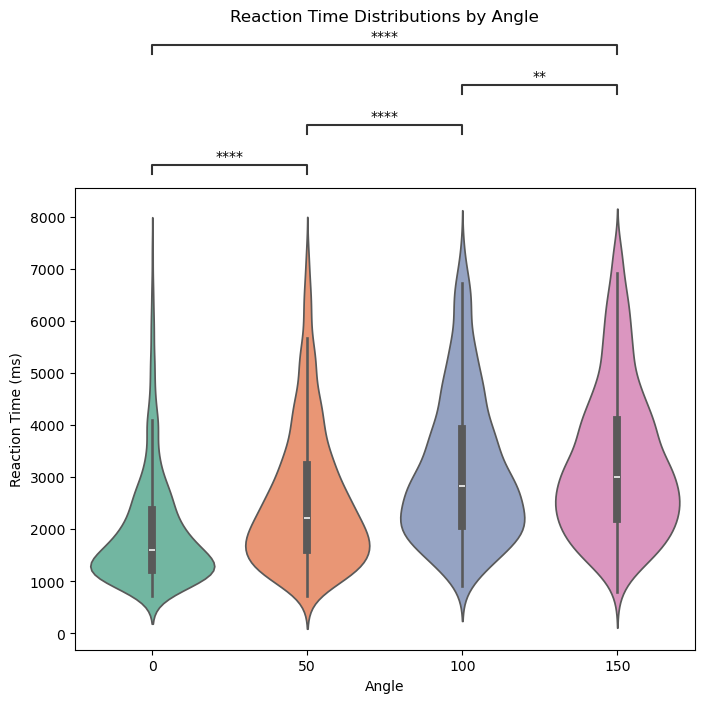

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='Angle', y='Time', data=df, inner='box', palette='Set2')
# Define pairs to compare
pairs = [(0, 50), (50, 100), (100, 150), (0, 150)]
# Add the annotation
annotator = Annotator(ax, pairs, data=df, x='Angle', y='Time')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()
plt.xlabel('Angle')
plt.ylabel('Reaction Time (ms)')
plt.title('Reaction Time Distributions by Angle', pad=120)  # Increase the pad value to move the title higherplt.tight_layout()
plt.show()

In [35]:
percent_correct = df.groupby('Subject')['Correct'].mean() * 100
percent_correct
# for each participant determine the percentage of trials that are correct
speeds = df.groupby('Subject')['Time'].mean()
speeds

dfp = pd.DataFrame({
    'Percent Correct': percent_correct,
    'Average Reaction Time (ms)': speeds
})
# to dfp add a column of gender
# Map each Subject to their Sex using the original df
subject_to_sex = df.drop_duplicates('Subject').set_index('Subject')['Sex']
dfp['Sex'] = dfp.index.map(subject_to_sex)

In [36]:
# Split the data by gender
men = dfp[dfp['Sex'] == 'M']
women = dfp[dfp['Sex'] == 'F']
# t-test for Percent Correct (accuracy)
t_acc, p_acc = ttest_ind(men['Percent Correct'], women['Percent Correct'], equal_var=False)
print(f"Accuracy t-test: t = {t_acc:.2f}, p = {p_acc:.4f}")
# t-test for Average Reaction Time (speed)
t_rt, p_rt = ttest_ind(men['Average Reaction Time (ms)'], women['Average Reaction Time (ms)'], equal_var=False)
print(f"Reaction Time t-test: t = {t_rt:.2f}, p = {p_rt:.4f}")

Accuracy t-test: t = -1.15, p = 0.2567
Reaction Time t-test: t = -2.20, p = 0.0332


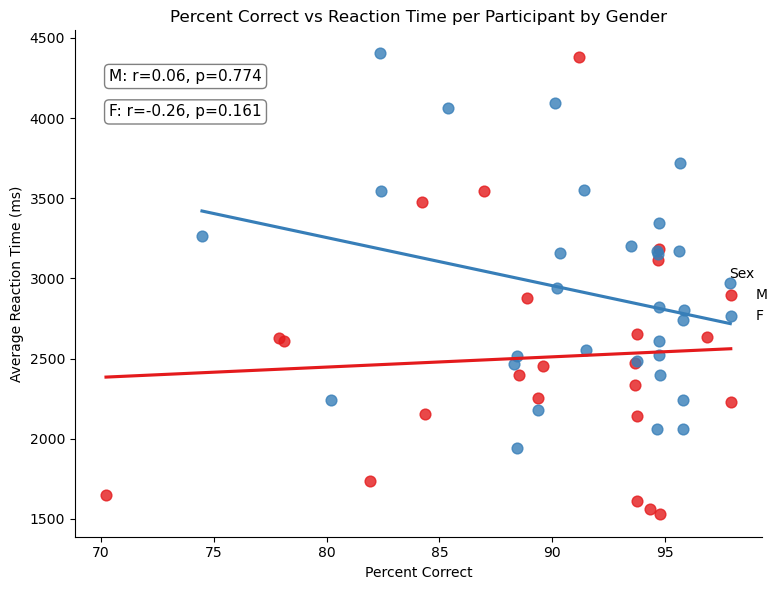

In [37]:
# Scatter plot of Percent Correct vs Average Reaction Time for every participant,
# with separate regression lines and colors for different genders
sns.lmplot(
    data=dfp,
    x='Percent Correct',
    y='Average Reaction Time (ms)',
    hue='Sex',
    palette='Set1',
    ci=None,
    height=6,
    aspect=1.2,
    scatter_kws={'s': 60, 'alpha': 0.8}
)
plt.xlabel('Percent Correct')
plt.ylabel('Average Reaction Time (ms)')
plt.title('Percent Correct vs Reaction Time per Participant by Gender')
# Calculate and display correlation and p-value for each gender
for sex in dfp['Sex'].unique():
    sub = dfp[dfp['Sex'] == sex]
    corr, pval = pearsonr(sub['Percent Correct'], sub['Average Reaction Time (ms)'])
    plt.annotate(f'{sex}: r={corr:.2f}, p={pval:.3f}',
                 xy=(0.05, 0.9 - 0.07 * list(dfp['Sex'].unique()).index(sex)),
                 xycoords='axes fraction',
                 fontsize=11,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))
plt.tight_layout()
plt.show()

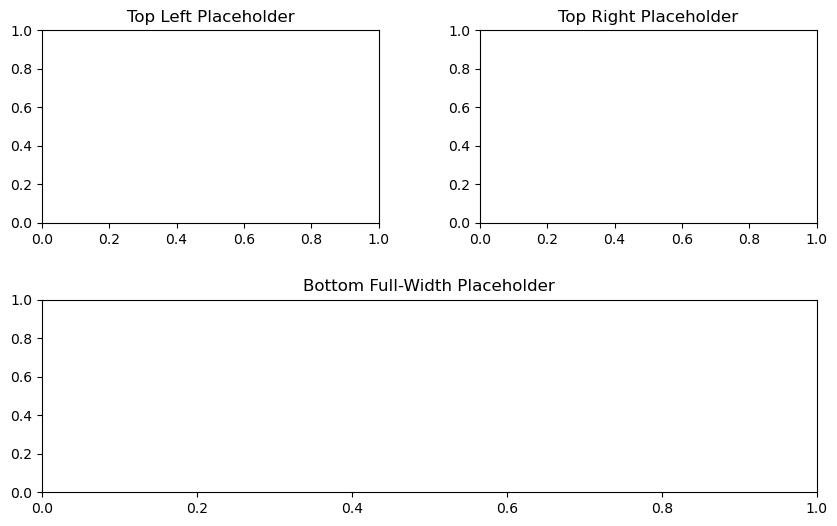

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 6))
# Create GridSpec layout: 2 rows, 2 columns
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.4, wspace=0.3)
# Top row subplots
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
# Bottom row subplot (spans both columns)
ax3 = fig.add_subplot(gs[1, :])  # Full-width bottom
# Add placeholder titles (optional)
ax1.set_title("Top Left Placeholder")
ax2.set_title("Top Right Placeholder")
ax3.set_title("Bottom Full-Width Placeholder")
# Display empty figure layout
plt.show()